In [1]:
#Import pandas, matplotlib.pyplot, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [2]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# upload credit table data

credit = pd.read_csv("credit_record.csv")

credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
credit = credit.sort_values('ID')

In [5]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


In [6]:
credit['STATUS2'] = credit['STATUS']

In [7]:
credit['STATUS2'].unique()

array(['X', '0', 'C', '1', '3', '2', '4', '5'], dtype=object)

In [8]:
credit = credit.replace({'STATUS2' :
                                          {'C' : 'Good',
                                           'X' : 'Good',
                                           '0' : 'Good',
                                           '1' : 'Bad',
                                           '2' : 'Bad',
                                           '3' : 'Bad',
                                           '4' : 'Bad',
                                           '5' : 'Bad'}})

In [9]:
credit.value_counts(subset=['ID', 'STATUS2']).unstack(fill_value=0)

STATUS2,Bad,Good
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [10]:
credit_result = credit.value_counts(subset=['ID', 'STATUS2']).unstack(fill_value=0).reset_index()

In [11]:
credit_result

STATUS2,ID,Bad,Good
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2


In [12]:
credit

,ID,MONTHS_BALANCE,STATUS,STATUS2
0,5001711,0,X,Good
1,5001711,-1,0,Good
2,5001711,-2,0,Good
3,5001711,-3,0,Good
22,5001712,-18,0,Good
...,...,...,...,...
1048547,5150487,-2,C,Good
1048546,5150487,-1,C,Good
1048545,5150487,0,C,Good
1048558,5150487,-13,C,Good


In [13]:
# create table for credit status

grouped = credit.groupby('ID')

credit_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
credit_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
credit_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
credit_tb['window'] = credit_tb['end_month'] - credit_tb['open_month']
credit_tb['window'] += 1  # Adding 1 since month starts at 0.


# Change Status 

credit_tb['Good'] = credit_tb[credit_tb.iloc[:,0:61] == 'C'].count(axis = 1)
credit_tb['Good'] = credit_tb[credit_tb.iloc[:,0:61] == '0'].count(axis = 1)
credit_tb['Bad'] = credit_tb[credit_tb.iloc[:,0:61] == '1'].count(axis = 1)
credit_tb['Bad'] = credit_tb[credit_tb.iloc[:,0:61] == '2'].count(axis = 1)
credit_tb['Bad'] = credit_tb[credit_tb.iloc[:,0:61] == '3'].count(axis = 1)
credit_tb['Bad'] = credit_tb[credit_tb.iloc[:,0:61] == '4'].count(axis = 1)
credit_tb['Bad'] = credit_tb[credit_tb.iloc[:,0:61] == '5'].count(axis = 1)
credit_tb['Good'] = credit_tb[credit_tb.iloc[:,0:61] == 'X'].count(axis = 1)

#Setting Id column to merge with app data.
credit_tb['ID'] = credit_tb.index

In [14]:
credit_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-3,-2,-1,0,open_month,end_month,window,Good,Bad,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,X,-3,0,4,1,0,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,-18,0,19,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,-21,0,22,22,0,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,-14,0,15,15,0,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,-59,0,60,60,0,5001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-28,-11,18,0,0,5150482
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,-17,0,18,18,0,5150483
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,C,-12,0,13,0,0,5150484


In [15]:
# replace Nans with 0


credit_tb = credit_tb.fillna(0)

In [16]:

credit_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-3,-2,-1,0,open_month,end_month,window,Good,Bad,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,X,-3,0,4,1,0,5001711
5001712,0,0,0,0,0,0,0,0,0,0,...,C,C,C,C,-18,0,19,0,0,5001712
5001713,0,0,0,0,0,0,0,0,0,0,...,X,X,X,X,-21,0,22,22,0,5001713
5001714,0,0,0,0,0,0,0,0,0,0,...,X,X,X,X,-14,0,15,15,0,5001714
5001715,0,X,X,X,X,X,X,X,X,X,...,X,X,X,X,-59,0,60,60,0,5001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-28,-11,18,0,0,5150482
5150483,0,0,0,0,0,0,0,0,0,0,...,X,X,X,X,-17,0,18,18,0,5150483
5150484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,C,-12,0,13,0,0,5150484


In [18]:
credit_result

STATUS2,ID,Bad,Good
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2


In [19]:
credit_result.to_csv('credit_result.csv', index=False)

In [20]:
# drop duplicates

credit2 = credit2.drop_duplicates('ID', keep='last') 
credit2

,ID,MONTHS_BALANCE,STATUS,STATUS2,-60,-59,-58,-57,-56,-55,...,-4,-3,-2,-1,0,open_month,end_month,window,Good,Bad
3,5001711,-3,0,Good,0,0,0,0,0,0,...,0,0,0,0,X,-3,0,4,1,0
12,5001712,-8,C,Good,0,0,0,0,0,0,...,C,C,C,C,C,-18,0,19,0,0
27,5001713,-4,X,Good,0,0,0,0,0,0,...,X,X,X,X,X,-21,0,22,22,0
51,5001714,-6,X,Good,0,0,0,0,0,0,...,X,X,X,X,X,-14,0,15,15,0
81,5001715,-21,X,Good,0,X,X,X,X,X,...,X,X,X,X,X,-59,0,60,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048502,5150482,-19,0,Good,0,0,0,0,0,0,...,0,0,0,0,0,-28,-11,18,0,0
1048520,5150483,-8,X,Good,0,0,0,0,0,0,...,X,X,X,X,X,-17,0,18,18,0
1048536,5150484,-6,0,Good,0,0,0,0,0,0,...,0,0,0,0,C,-12,0,13,0,0
1048544,5150485,-1,0,Good,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,2,0,0


In [22]:
# drop STATUS column

credit2 = credit2.drop(columns=['STATUS'])
credit2

,ID,MONTHS_BALANCE,STATUS2,-60,-59,-58,-57,-56,-55,-54,...,-4,-3,-2,-1,0,open_month,end_month,window,Good,Bad
3,5001711,-3,Good,0,0,0,0,0,0,0,...,0,0,0,0,X,-3,0,4,1,0
12,5001712,-8,Good,0,0,0,0,0,0,0,...,C,C,C,C,C,-18,0,19,0,0
27,5001713,-4,Good,0,0,0,0,0,0,0,...,X,X,X,X,X,-21,0,22,22,0
51,5001714,-6,Good,0,0,0,0,0,0,0,...,X,X,X,X,X,-14,0,15,15,0
81,5001715,-21,Good,0,X,X,X,X,X,X,...,X,X,X,X,X,-59,0,60,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048502,5150482,-19,Good,0,0,0,0,0,0,0,...,0,0,0,0,0,-28,-11,18,0,0
1048520,5150483,-8,Good,0,0,0,0,0,0,0,...,X,X,X,X,X,-17,0,18,18,0
1048536,5150484,-6,Good,0,0,0,0,0,0,0,...,0,0,0,0,C,-12,0,13,0,0
1048544,5150485,-1,Good,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,2,0,0


In [23]:
# final status will be determined based on length of open accounts

In [20]:
# upload application data

app = pd.read_csv("application_record.csv")

In [21]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [22]:
# drop duplicates
app = app.drop_duplicates('ID', keep='last') 
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


<AxesSubplot:>

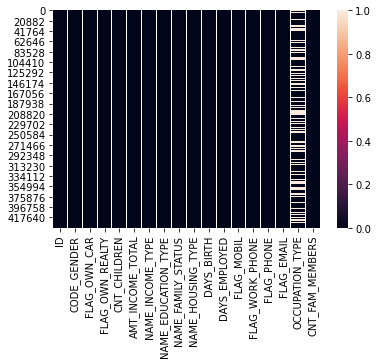

In [23]:
# check for nulls

sns.heatmap(app.isnull())

In [24]:
# convert days to years

app['DAYS_BIRTH'] = round(app['DAYS_BIRTH']/-365,0).astype(int)
app['DAYS_EMPLOYED'] = round(app['DAYS_EMPLOYED']/-365,0).astype(int)


app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1


In [25]:
# remove columns

app.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','OCCUPATION_TYPE'], inplace=True)
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,-1001,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44,8,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,-1001,2


In [26]:
#renamed columns

app.rename(columns = {'CODE_GENDER':'GENDER','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property','CNT_CHILDREN':'Children', 
                                     'AMT_INCOME_TOTAL':'Income', 
                                     'NAME_INCOME_TYPE':'Job', 'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Martial_Status', 
                                     'NAME_HOUSING_TYPE':'Housing', 'DAYS_BIRTH':'Age','DAYS_EMPLOYED': 'Employed_Years','FLAG_MOBIL': 'Cell_Phone','FLAG_WORK_PHONE':'Work_Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation', 'CNT_FAM_MEMBERS':'Family_Size'}, inplace=True)




app





,ID,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,-1001,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44,8,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,-1001,2


In [27]:
# check for nulls

app.isnull().sum()

ID                0
GENDER            0
Car               0
Property          0
Children          0
Income            0
Job               0
Education         0
Martial_Status    0
Housing           0
Age               0
Employed_Years    0
Family_Size       0
dtype: int64

In [28]:
app.to_csv('app.csv', index=False)

In [31]:
app

,ID,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,-1001,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44,8,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,-1001,2


In [32]:
credit_result

STATUS2,ID,Bad,Good
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2
